In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

C:\Users\Asus\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2018-06-07 14:48:28,907 : INFO : loading projection weights from ruscorpora_upos_skipgram_300_5_2018.vec.gz
2018-06-07 14:49:44,353 : INFO : loaded (195071, 300) matrix from ruscorpora_upos_skipgram_300_5_2018.vec.gz


In [3]:
model.init_sims (replace=True)

2018-06-07 14:49:46,342 : INFO : precomputing L2-norms of word weight vectors


In [24]:
words_sem = ['ехать_VERB', 'ездить_VERB', 'кататься_VERB', 'катить_VERB', 'колесить_VERB', 'путешествовать_VERB', 'скакать_VERB', 'лететь_VERB', 'мчаться_VERB', 'нестись_VERB', 'гнать_VERB']

In [25]:
G = nx.Graph()
G.add_nodes_from(words_sem)
for u_word in words_sem:
    for word in words_sem:
        # есть ли слово в модели? Может быть, и нет
        if word in model:
            Cos = model.similarity(u_word, word)
            if Cos < 0.9999 and Cos > 0.5:
                G.add_edge(u_word,word)
        else:
            print ('No such word in model')
print('узлы', G.nodes())
print('рёбра', G.edges())

узлы ['ехать_VERB', 'ездить_VERB', 'кататься_VERB', 'катить_VERB', 'колесить_VERB', 'путешествовать_VERB', 'скакать_VERB', 'лететь_VERB', 'мчаться_VERB', 'нестись_VERB', 'гнать_VERB']
рёбра [('ехать_VERB', 'ездить_VERB'), ('ехать_VERB', 'катить_VERB'), ('ехать_VERB', 'лететь_VERB'), ('ехать_VERB', 'мчаться_VERB'), ('ездить_VERB', 'кататься_VERB'), ('ездить_VERB', 'колесить_VERB'), ('ездить_VERB', 'путешествовать_VERB'), ('катить_VERB', 'мчаться_VERB'), ('катить_VERB', 'нестись_VERB'), ('колесить_VERB', 'путешествовать_VERB'), ('скакать_VERB', 'лететь_VERB'), ('скакать_VERB', 'мчаться_VERB'), ('скакать_VERB', 'нестись_VERB'), ('лететь_VERB', 'мчаться_VERB'), ('лететь_VERB', 'нестись_VERB'), ('мчаться_VERB', 'нестись_VERB'), ('мчаться_VERB', 'гнать_VERB'), ('нестись_VERB', 'гнать_VERB')]


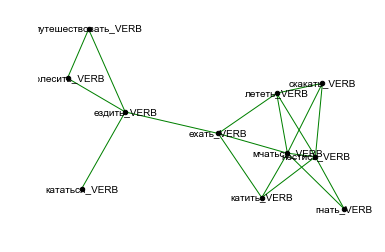

In [26]:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='black', node_size=20)
nx.draw_networkx_edges(G, pos, edge_color='green')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial')
plt.axis('off')
plt.show()

In [27]:
central_words = []
deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    central_words.append(nodeid)
print('3 самых центральных слова графа:', ", ".join(central_words[:3]))

3 самых центральных слова графа: мчаться_VERB, нестись_VERB, ехать_VERB


In [32]:
print('Радиус графа -', nx.radius(G))

Радиус графа - 2


In [34]:
print('Коэффициент кластеризации -', nx.average_clustering(G))
#print(nx.transitivity(G))

Коэффициент кластеризации - 0.6181818181818182
